In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
world = pd.read_csv('World population growth rate by cities 2024.csv')
world

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
...,...,...,...,...,...,...
796,Bhavnagar,India,Asia,751493,737128,0.0195
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073
798,Huambo,Angola,Africa,751297,727641,0.0325
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109


In [3]:
world.describe()

,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


In [4]:
world.head()

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [6]:
world.isnull().sum()

City                  0
Country               0
Continent            11
Population (2024)     0
Population (2023)     0
Growth Rate           0
dtype: int64

In [8]:
import requests

def get_continent(country_name):
    url = f"https://restcountries.com/v3.1/name/{country_name}"
    response = requests.get(url)
    if response.status_code == 200:
        country_data = response.json()
        return country_data[0]['continents'][0]
    return None

missing_continent_cities = world[world['Continent'].isnull()]

for index, row in missing_continent_cities.iterrows():
    continent = get_continent(row['Country'])
    world.at[index, 'Continent'] = continent

In [9]:
world.isnull().sum()

City                 0
Country              0
Continent            0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

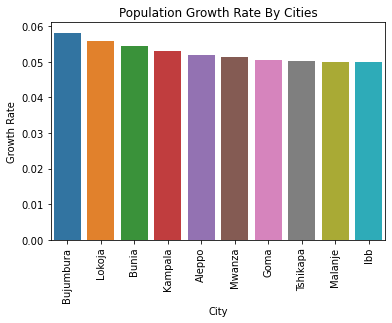

In [21]:
top_cities = world.nlargest(10,'Growth Rate')
sns.barplot(x='City',y='Growth Rate',data=top_cities)
plt.title('Population Growth Rate By Cities')
plt.xlabel('City')
plt.ylabel('Growth Rate')
plt.xticks(rotation=90)
plt.show()

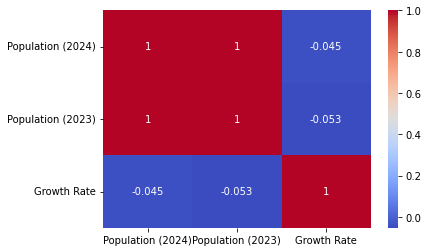

In [23]:
sns.heatmap(world.corr(), annot=True, cmap='coolwarm')
plt.show()

In [58]:
import plotly.express as px

world['Marker Size'] = world['Growth Rate'].abs() * 1000  # Adjust scaling factor

fig = px.scatter_geo(world, locations="Country", locationmode='country names',
                     color="Continent", size="Marker Size",
                     hover_name="City", title="Population Growth Rates by City")
fig.show()

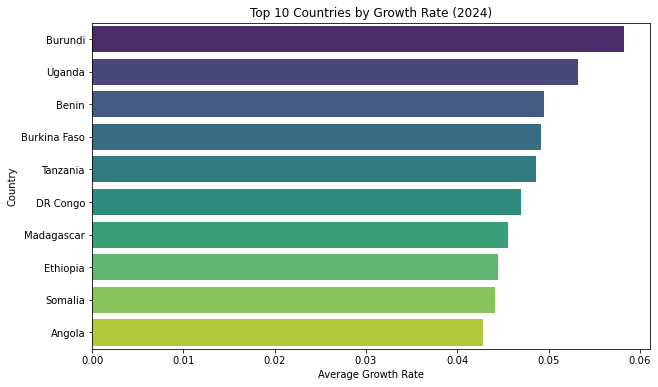

In [47]:
country_growth = world.groupby('Country')['Growth Rate'].mean().reset_index()

top_10_countries = country_growth.sort_values(by='Growth Rate', ascending=False).head(10)

top_10_countries

plt.figure(figsize=(10, 6))
sns.barplot(x='Growth Rate', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Growth Rate (2024)')
plt.xlabel('Average Growth Rate')
plt.ylabel('Country')
plt.show()


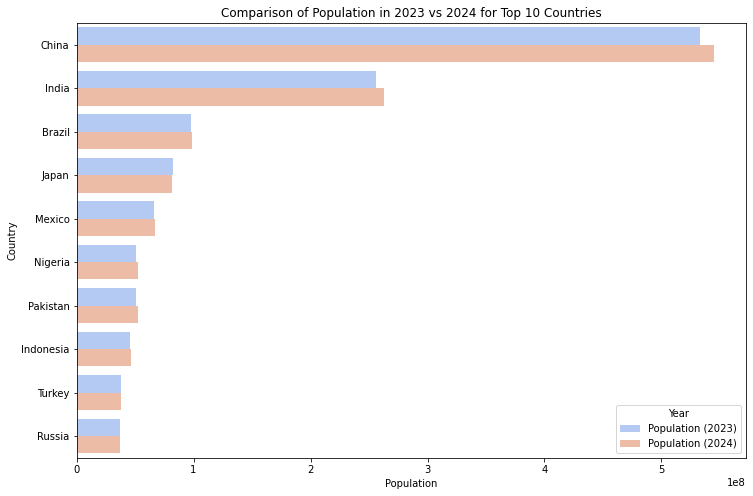

In [48]:
# Ensure 'Population (2023)' and 'Population (2024)' are numeric
world['Population (2023)'] = pd.to_numeric(world['Population (2023)'], errors='coerce')
world['Population (2024)'] = pd.to_numeric(world['Population (2024)'], errors='coerce')

# Group by country (or city) and calculate the sum for each year
population_comparison = world.groupby('Country')[['Population (2023)', 'Population (2024)']].sum().reset_index()

# Sort countries by population in 2024 and select the top 10
top_10_population_comparison = population_comparison.sort_values(by='Population (2024)', ascending=False).head(10)

# Melt the dataframe to have a 'Year' column for better plotting
melted_df = top_10_population_comparison.melt(id_vars='Country', value_vars=['Population (2023)', 'Population (2024)'],
                                              var_name='Year', value_name='Population')

plt.figure(figsize=(12, 8))
sns.barplot(x='Population', y='Country', hue='Year', data=melted_df, palette='coolwarm')
plt.title('Comparison of Population in 2023 vs 2024 for Top 10 Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.legend(title='Year')
plt.show()



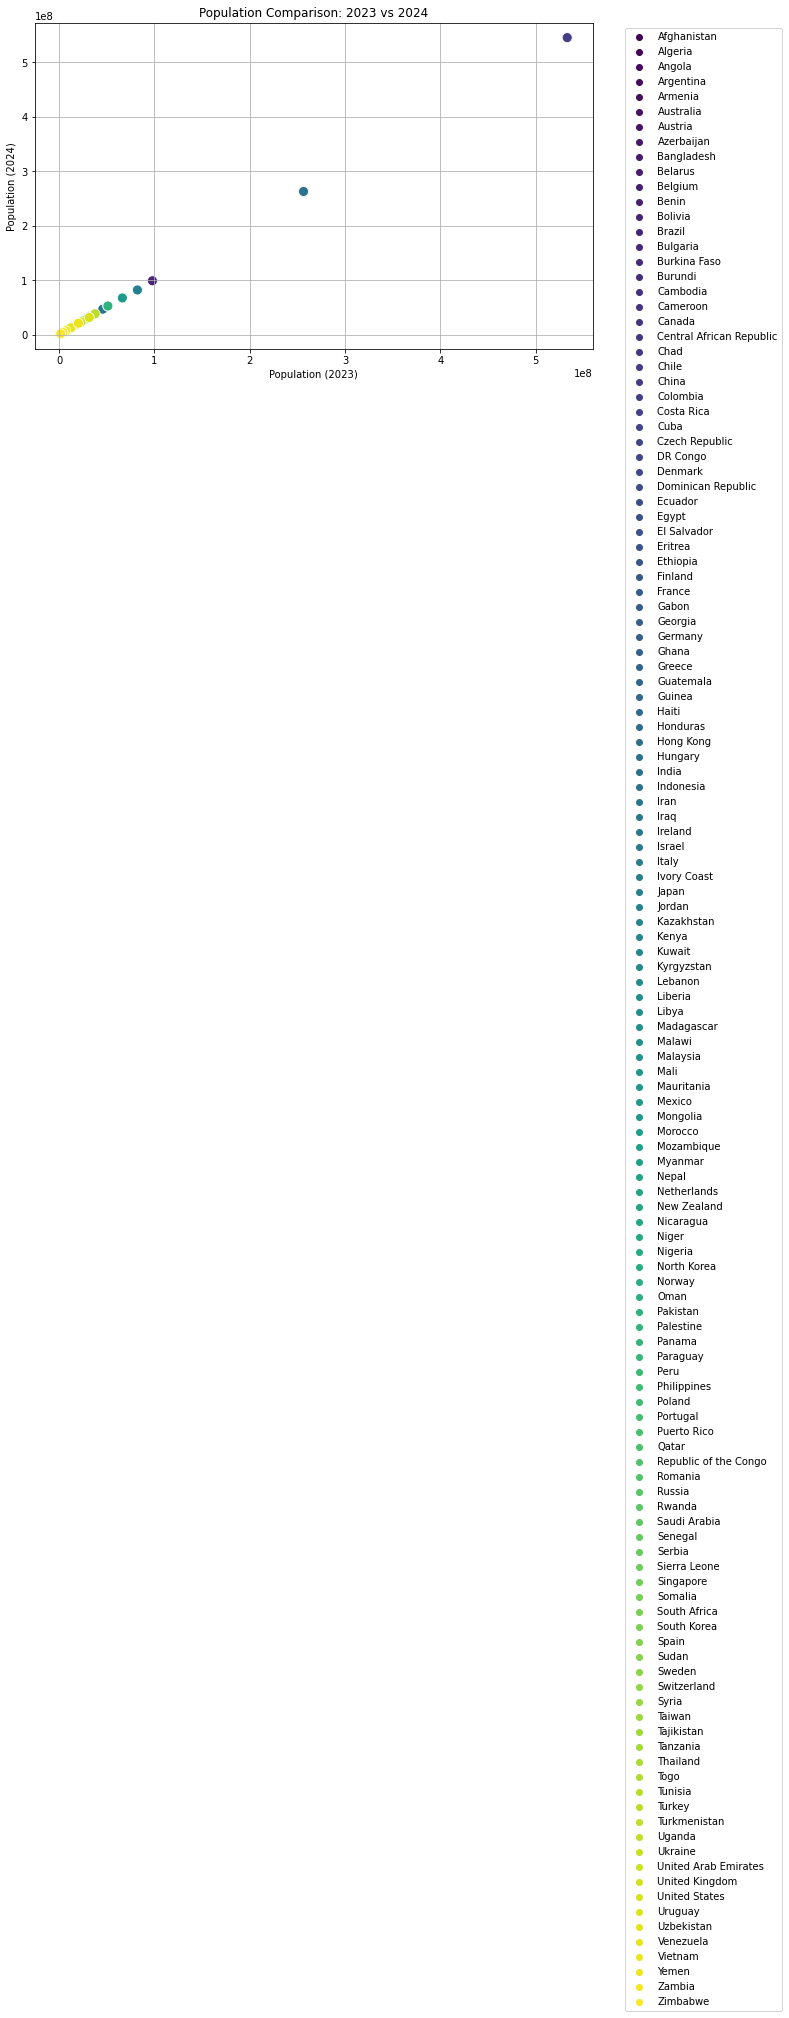

In [51]:
# Ensure 'Population (2023)' and 'Population (2024)' are numeric
world['Population (2023)'] = pd.to_numeric(world['Population (2023)'], errors='coerce')
world['Population (2024)'] = pd.to_numeric(world['Population (2024)'], errors='coerce')

# Group by country (or city) and calculate the sum for each year
population_comparison = world.groupby('Country')[['Population (2023)', 'Population (2024)']].sum().reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population (2023)', y='Population (2024)', data=population_comparison, hue='Country', palette='viridis', s=100)
plt.title('Population Comparison: 2023 vs 2024')
plt.xlabel('Population (2023)')
plt.ylabel('Population (2024)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()